<a href="https://colab.research.google.com/github/UzonduNA/AI_for_Intrusion_Detection_using_Google_Colaboratory.ipynb/blob/main/AI_for_Intrusion_Detection_using_Google_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the network traffic data (i.e. pre_XIIoTID.csv) from your local drive**

In [2]:
from google.colab import files
dataset = files.upload()

Saving lab work.csv to lab work.csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(dataset['pre_XIIoTID.csv']))

In [ ]:
data.head()

,proto,service,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,OSSEC_alert_level,Login_attmp,Succ_login,file_act,Proc_Act,R_W_physical,Is_privileged,class,class2,class3
0,1.000000,0.125,0.000000,0.000000,0.000000,0.004348,0.000000,0.000000,0.000000,0.000000,...,0.0,0,0,0,0,0,0,C&C,C&C,attack
1,0.666667,0.250,0.114371,0.892984,0.407472,0.004348,0.002479,0.933285,0.621222,0.839149,...,0.0,1,1,1,1,0,1,Exfiltration,Exfiltration,attack
2,1.000000,0.125,0.000118,0.543770,0.331015,0.004348,0.001653,0.868790,0.001286,0.645817,...,0.0,0,0,0,0,0,0,Normal,Normal,Normal
3,1.000000,0.125,0.000675,0.000000,0.000000,0.004348,0.000000,0.000000,0.000000,0.000000,...,0.0,0,0,0,0,0,0,Normal,Normal,Normal
4,1.000000,0.125,0.001290,0.664561,0.373039,0.004348,0.001653,0.907183,0.001286,0.797995,...,0.0,0,0,0,0,0,0,Normal,Normal,Normal


In [ ]:
data.shape

(820834, 62)

In [ ]:
from sklearn.model_selection import train_test_split

def preprocess_xiiot(data):
    while True:
        # Prompt user to choose the classification scenario
        print("Choose the classification scenario:")
        print("1. 2 classes\n2. 10 classes\n3. 19 classes")

        # Take user input for the classification scenario
        scenario_option = input("Enter the number for the classification scenario: ")

        # Check if the input is valid (1, 2, or 3)
        if scenario_option in ['1', '2', '3']:
            break  # Break the loop if the input is valid
        else:
            print("Invalid input. Please enter 1, 2, or 3.")

    # Logic to select the label based on the chosen scenario
    if scenario_option == '1':
        my_label = data.iloc[:, 61]  # Choose label_2 for 2 classes
    elif scenario_option == '2':
        my_label = data.iloc[:, 60]  # Choose label_10 for 10 classes
    else:
        my_label = data.iloc[:, 59]  # Choose label_19 for 19 classes

    features = data.iloc[:, :59]
    my_label = pd.get_dummies(my_label)

    # split data into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(features, my_label, test_size=0.3, random_state=142)

    return X_train, X_test, y_train, y_test


In [ ]:
# Perform the data pre-processing
X_train, X_test, y_train, y_test = preprocess_xiiot(data)

Choose the classification scenario:
1. 2 classes
2. 10 classes
3. 19 classes
Enter the number for the classification scenario: 1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def descriptive_stats(X_train, X_test, y_train, y_test):
    # Summary statistics for features in X_train
    summary_stats = X_train.describe()
    print(summary_stats)

    # Plot histograms for each feature in X_train
    for column in X_train.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(X_train[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    # Unique classes and their counts in y_train
    unique_classes_train, counts_train = np.unique(np.argmax(y_train.values, axis=1), return_counts=True)
    class_counts_train = dict(zip(unique_classes_train, counts_train))

    print("Classes and their counts in y_train:")
    for class_index, count in class_counts_train.items():
        print(f"Class {class_index}: Count - {count}")

    # Unique classes and their counts in y_test
    unique_classes_test, counts_test = np.unique(np.argmax(y_test.values, axis=1), return_counts=True)
    class_counts_test = dict(zip(unique_classes_test, counts_test))

    print("\nClasses and their counts in y_test:")
    for class_index, count in class_counts_test.items():
        print(f"Class {class_index}: Count - {count}")

    return summary_stats


               proto        service       duration     orig_bytes  \
count  574583.000000  574583.000000  574583.000000  574583.000000   
mean        0.826121       0.282830       0.219277       0.308407   
std         0.169058       0.290915       0.305296       0.342833   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.666667       0.125000       0.000285       0.000000   
50%         0.666667       0.250000       0.014942       0.153137   
75%         1.000000       0.250000       0.403313       0.623094   
max         1.000000       1.000000       1.000000       0.999953   

          resp_bytes   missed_bytes      orig_pkts  orig_ip_bytes  \
count  574583.000000  574583.000000  574583.000000  574583.000000   
mean        0.221826       0.004551       0.225654       0.484317   
std         0.284159       0.011606       0.284396       0.373513   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0043

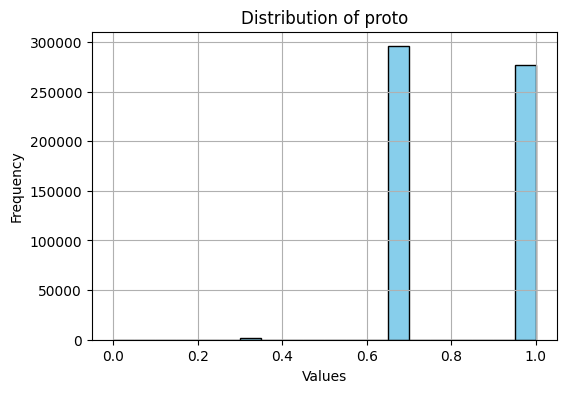

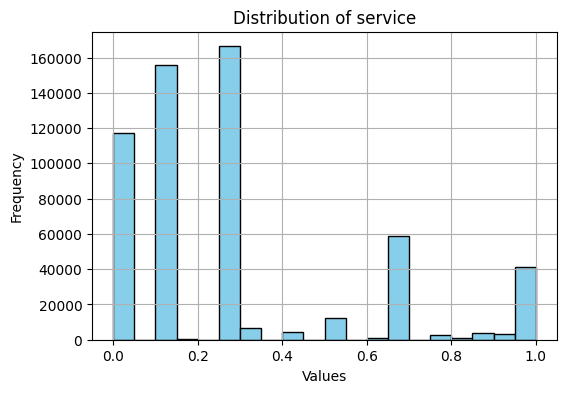

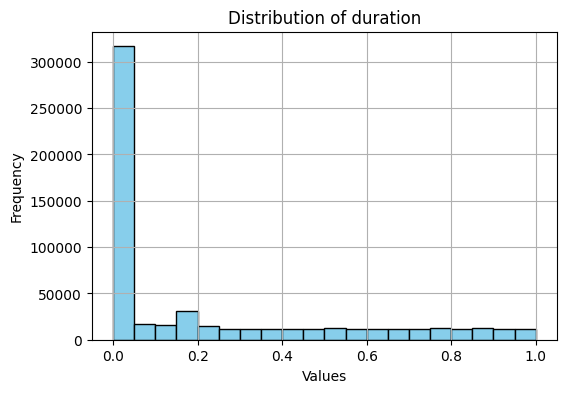

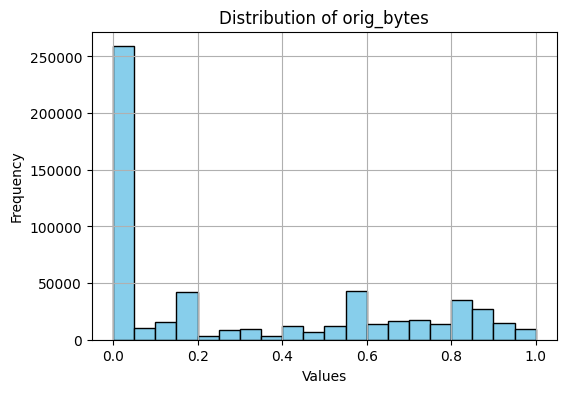

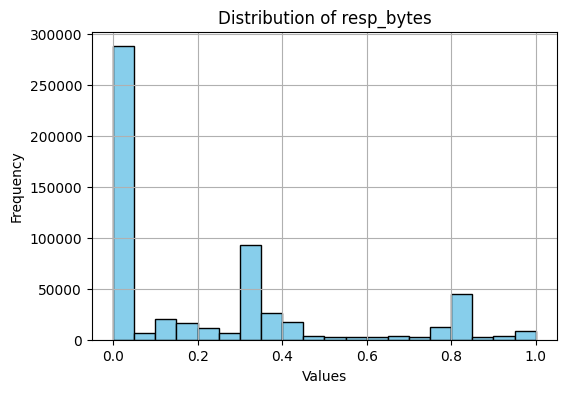

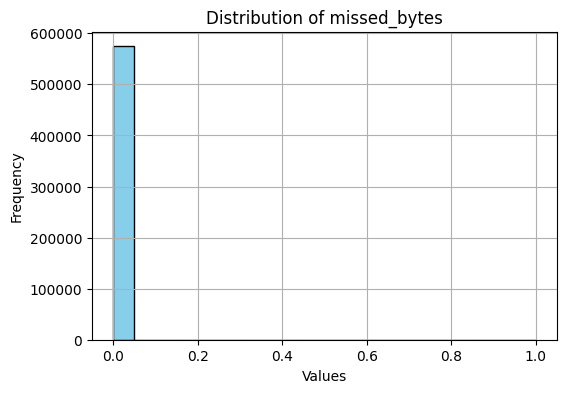

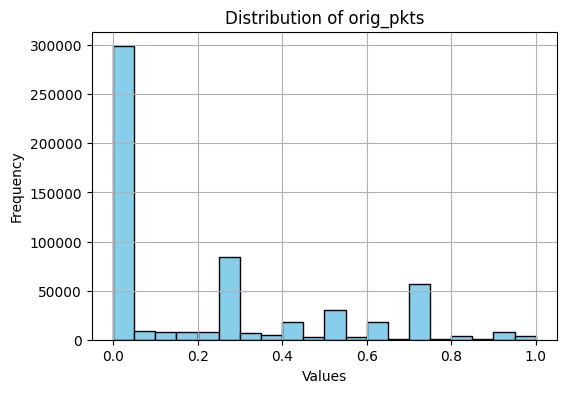

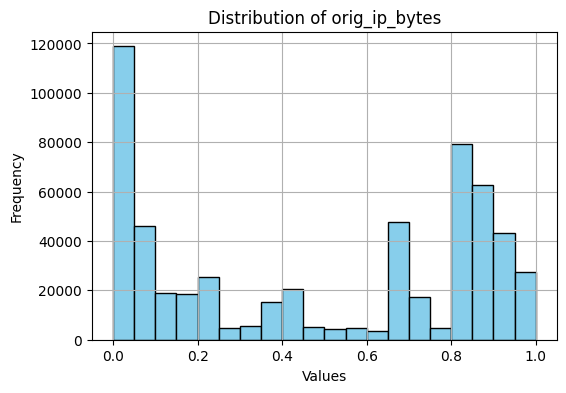

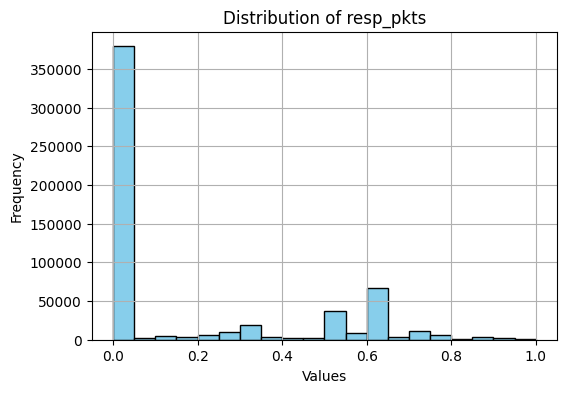

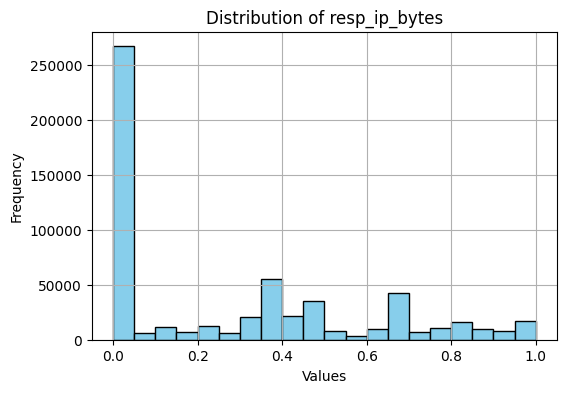

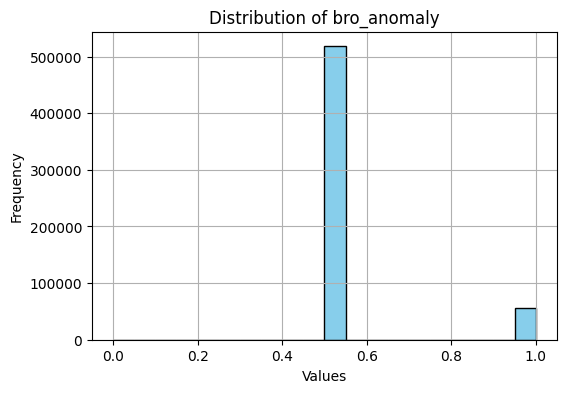

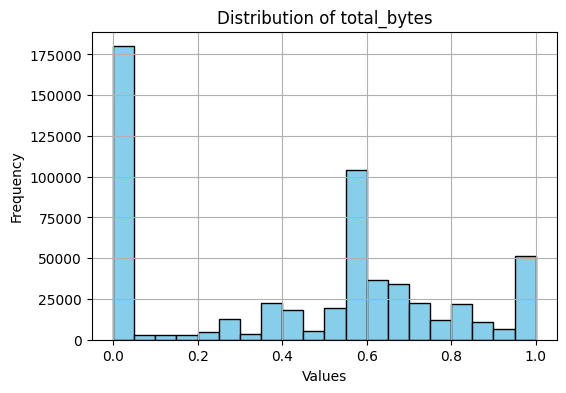

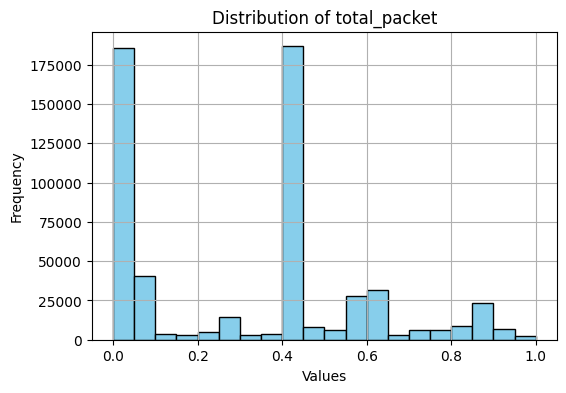

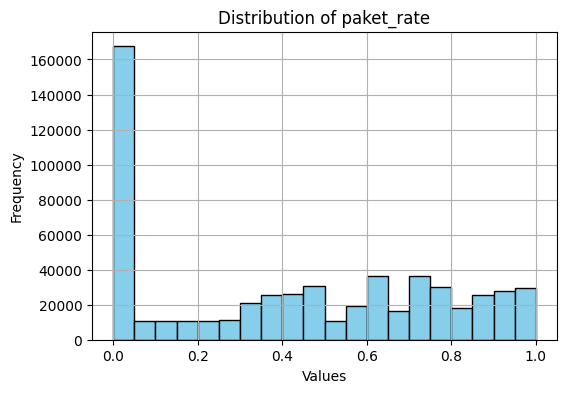

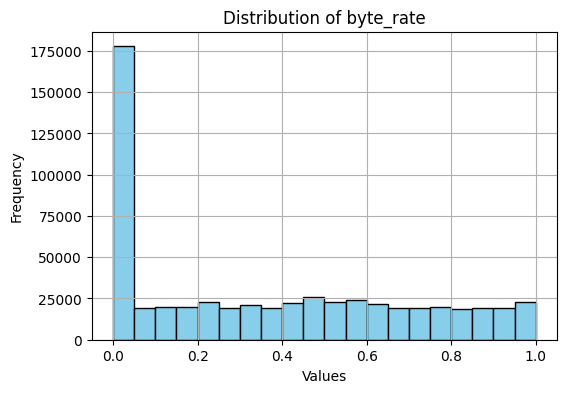

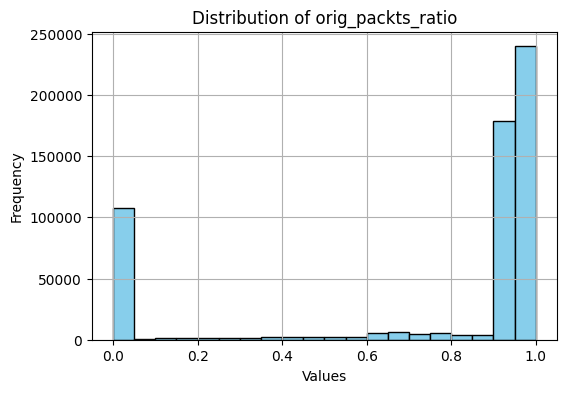

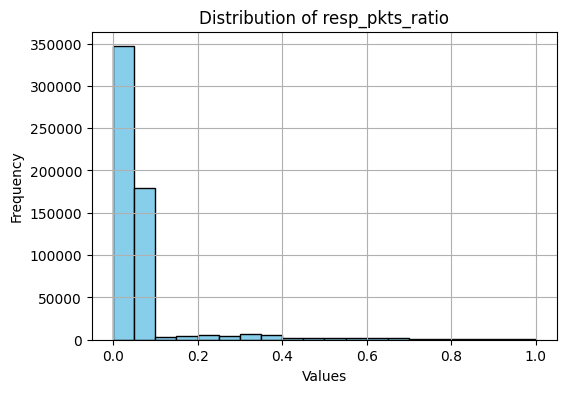

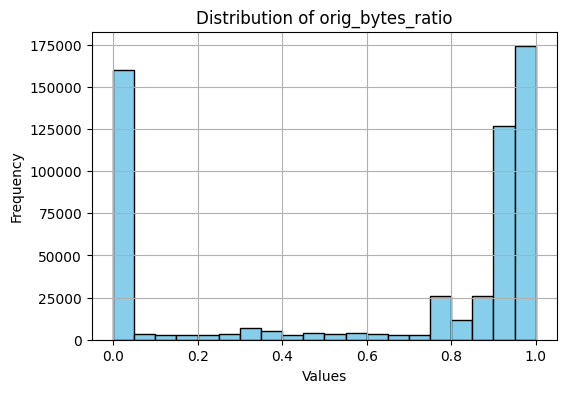

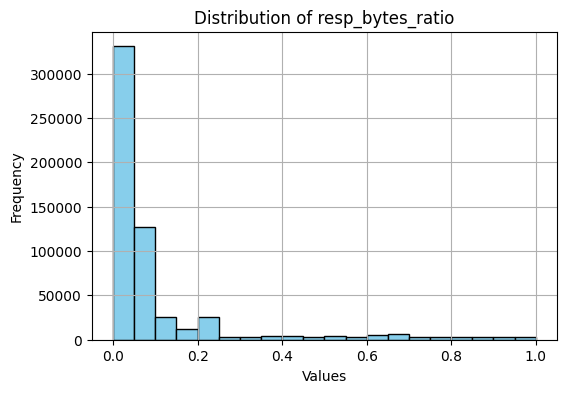

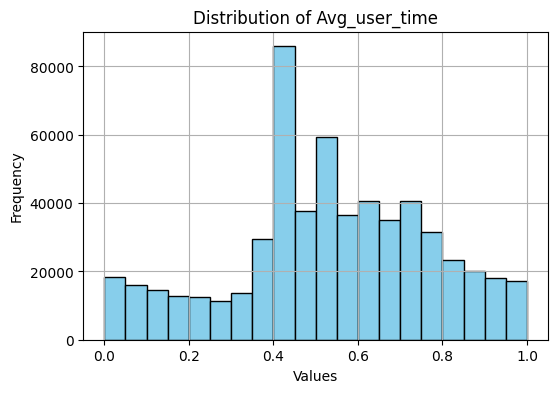

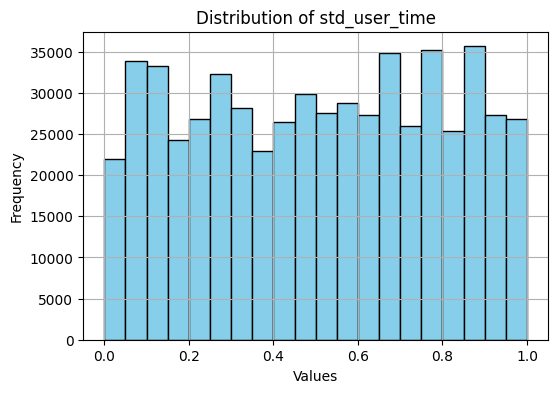

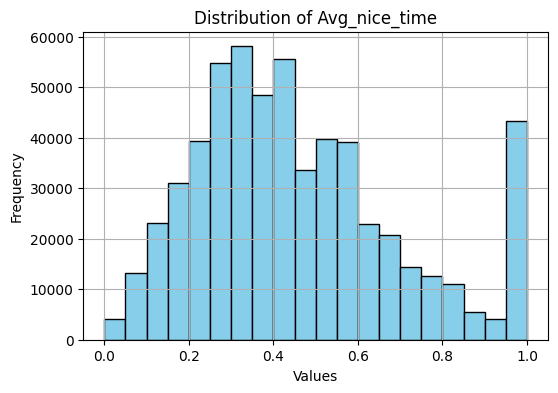

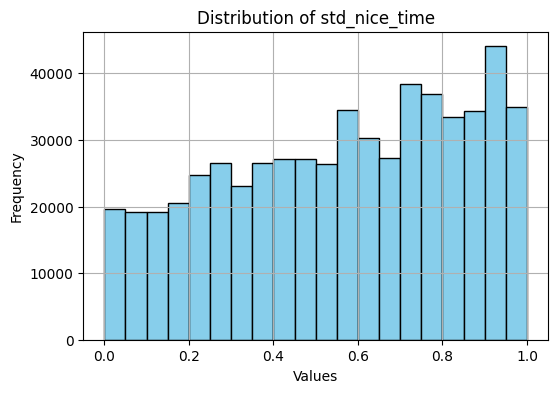

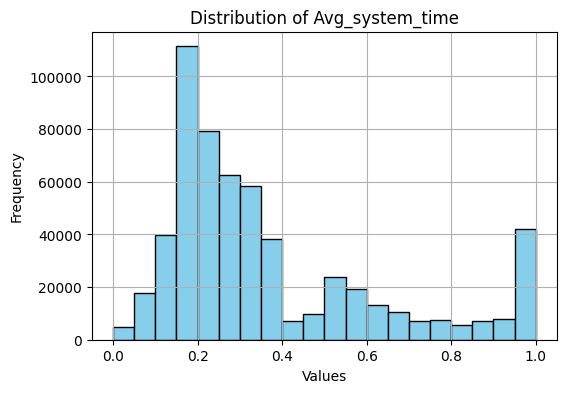

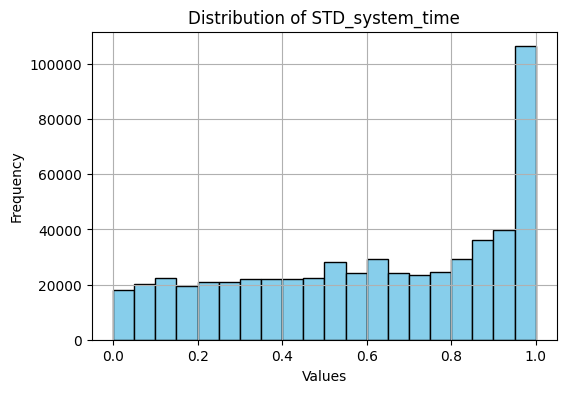

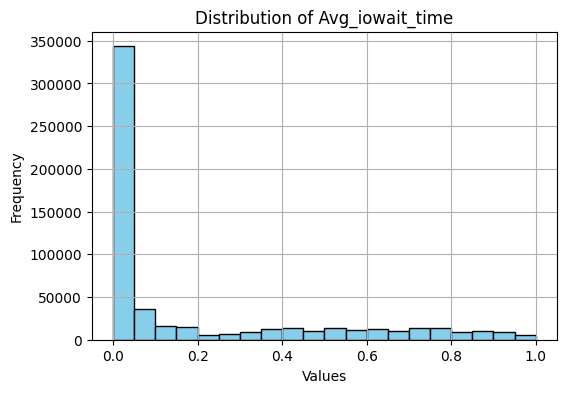

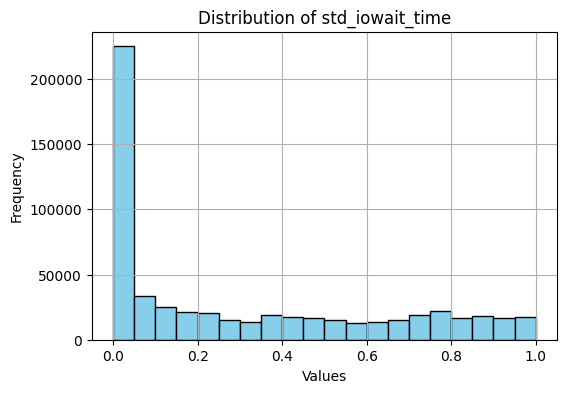

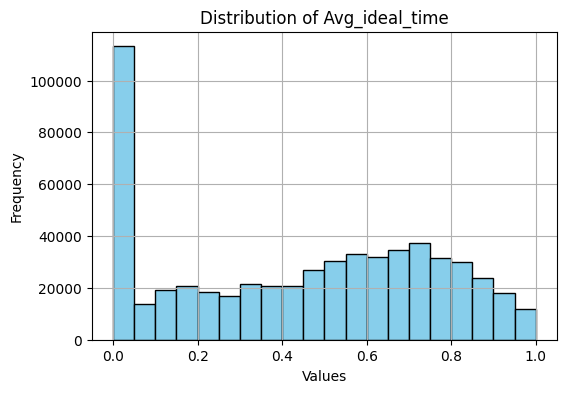

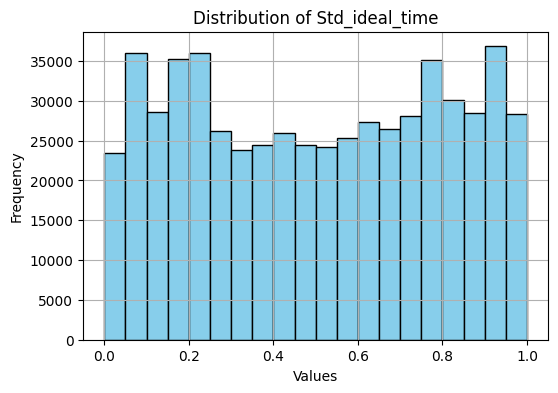

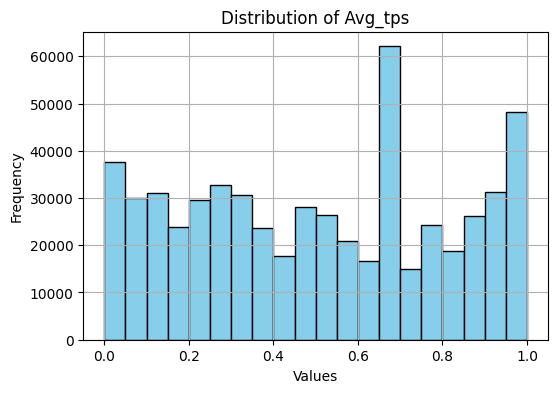

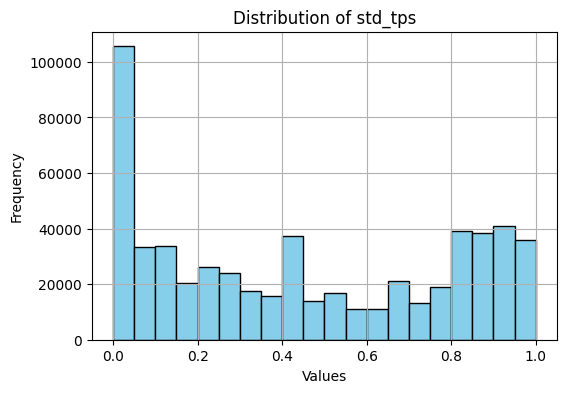

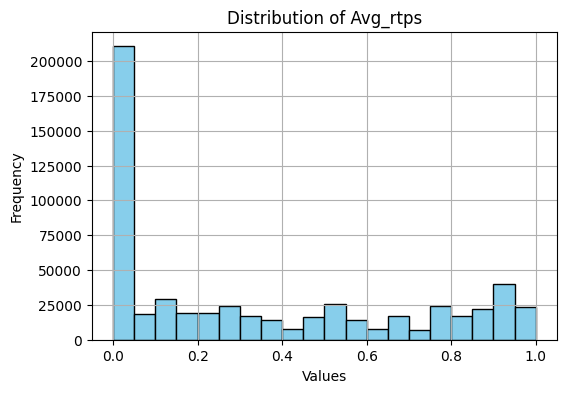

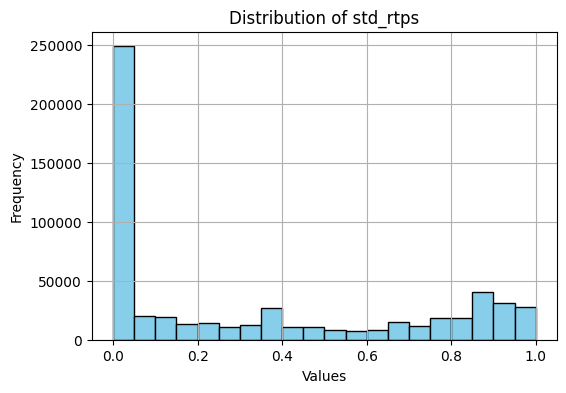

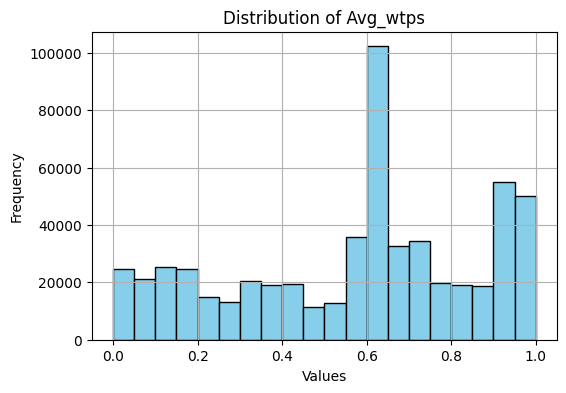

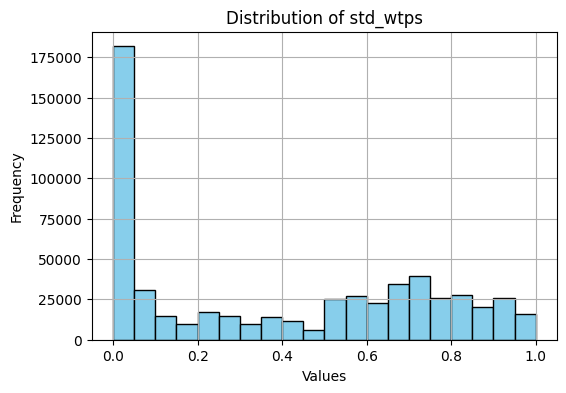

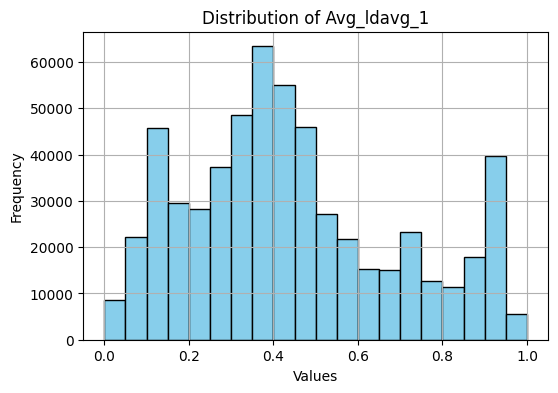

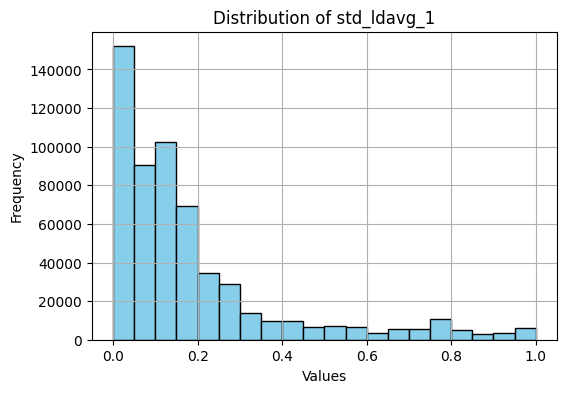

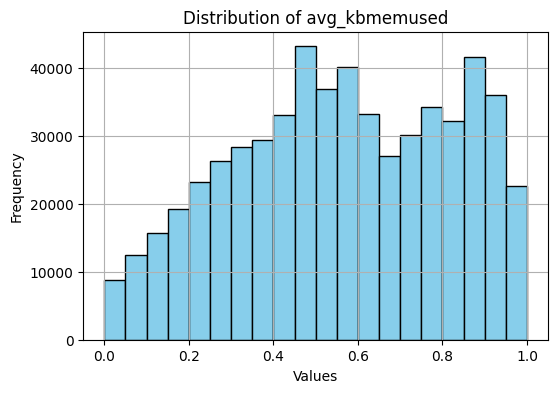

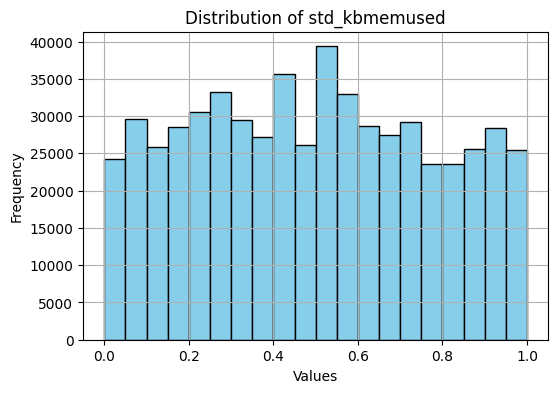

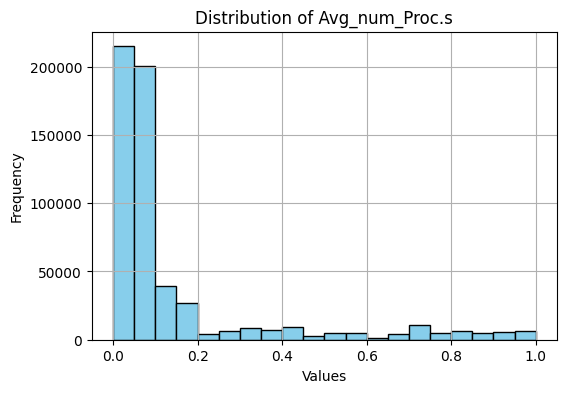

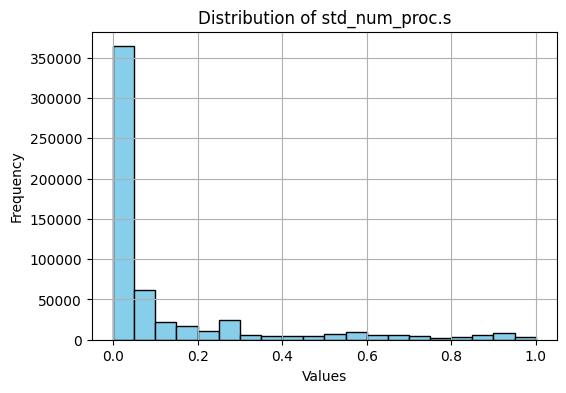

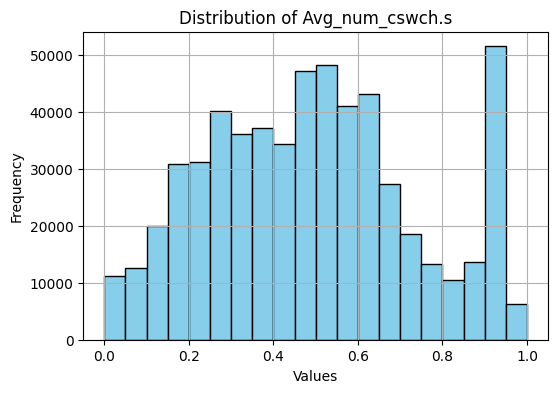

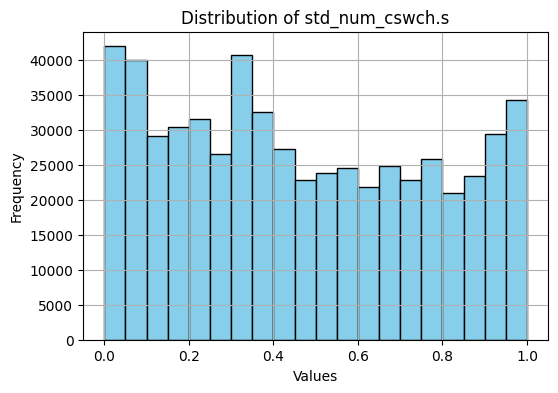

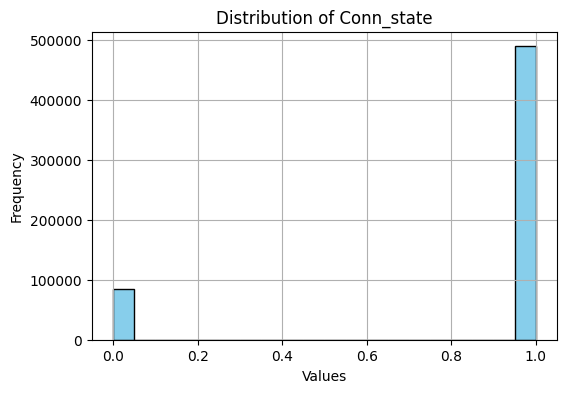

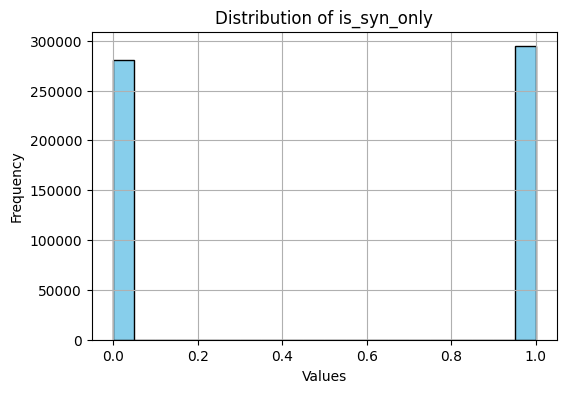

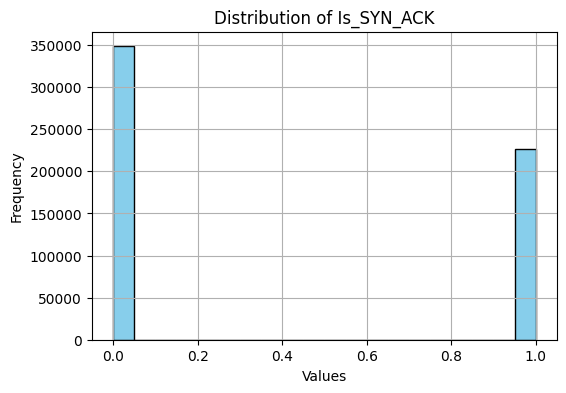

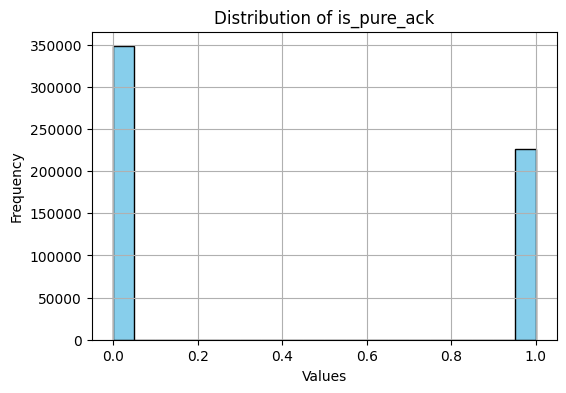

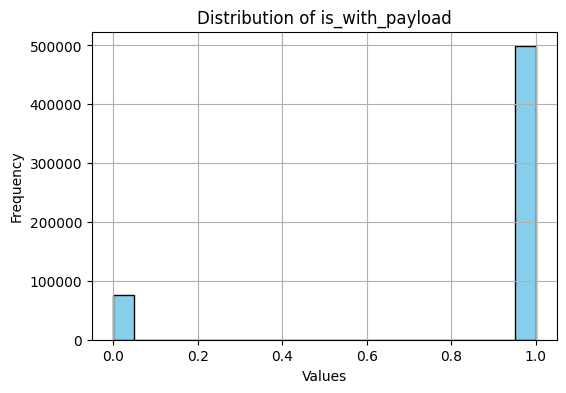

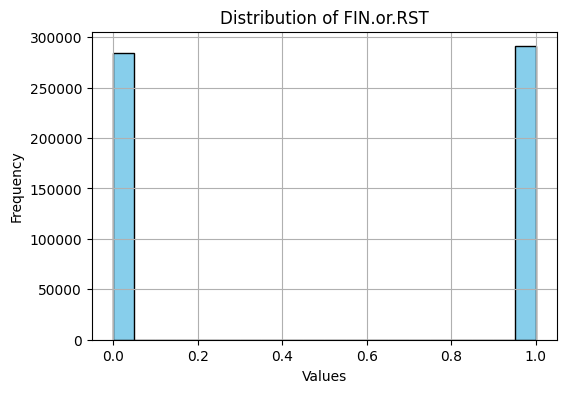

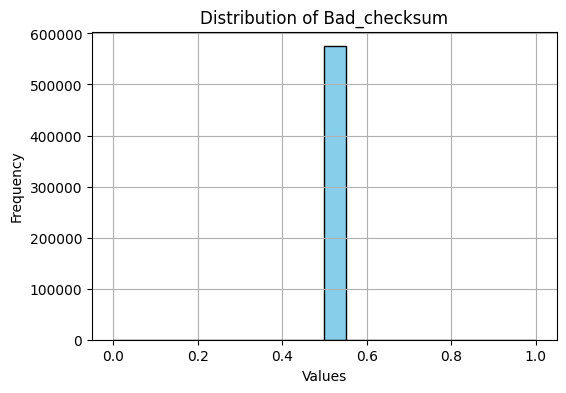

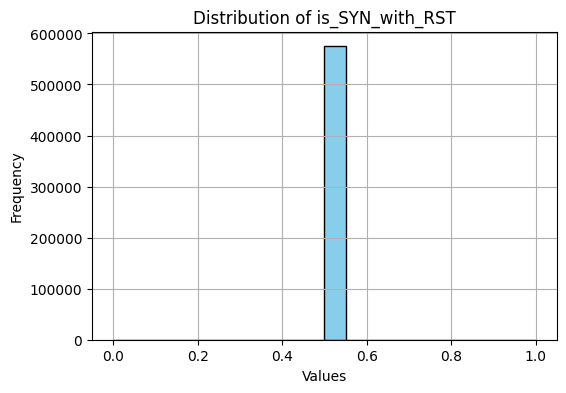

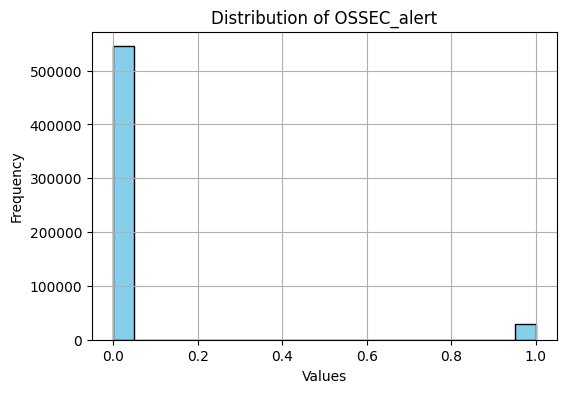

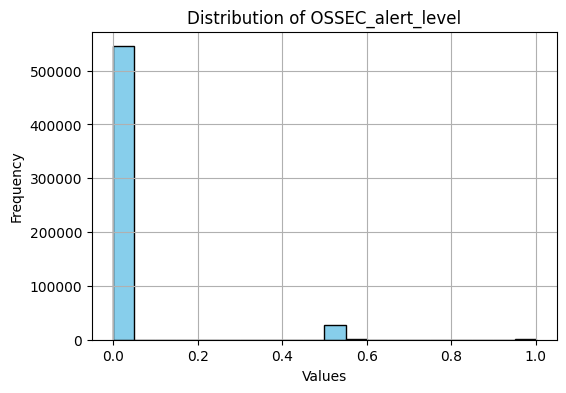

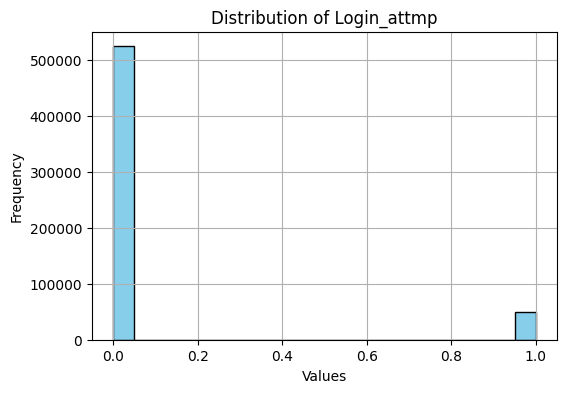

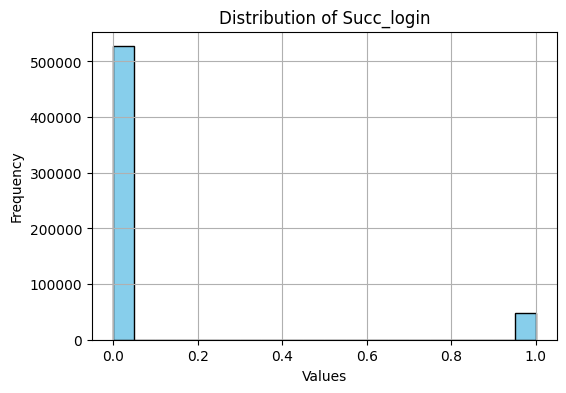

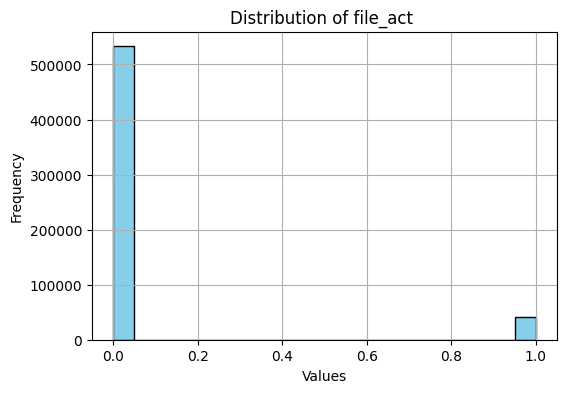

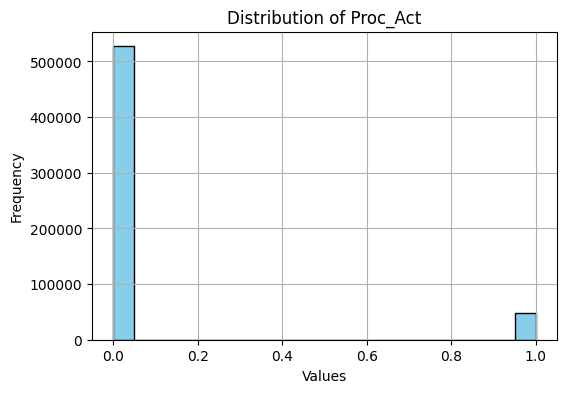

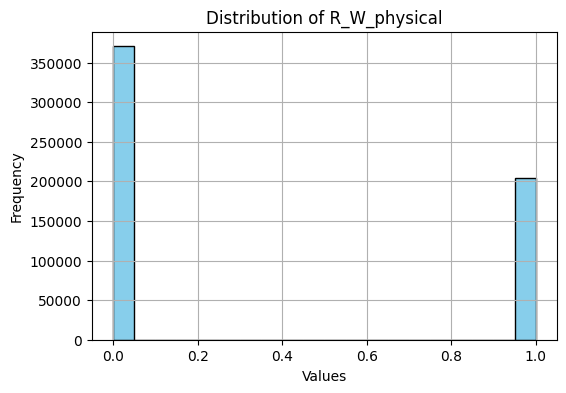

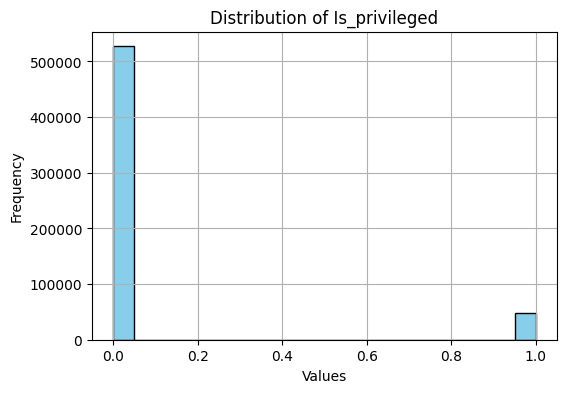

Classes and their counts in y_train:
Class 0: Count - 294783
Class 1: Count - 279800

Classes and their counts in y_test:
Class 0: Count - 126634
Class 1: Count - 119617


In [ ]:
 # Descriptive Statistics
summary_stats = descriptive_stats(X_train, X_test, y_train, y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the deep neural network model
def create_model(feature_dim, num_classes):
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(feature_dim,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
num_classes = y_test.shape[1]
feature_dim = X_train.shape[1]

# Create the deep neural network model
model = create_model(feature_dim, num_classes)

In [ ]:
import time

def hold_out_training(model, X_train, y_train):
    start_time = time.time()
    history = model.fit(X_train, y_train, batch_size = 250, epochs=10, validation_split = 0.3, verbose=1)
    train_time = time.time() - start_time

    #Plot training and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_loss = range(1, len(loss) + 1)
    plt.figure(1)
    plt.plot(epochs_loss, loss, 'bo-', label = 'Training Loss')
    plt.plot(epochs_loss, val_loss,'r*-', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(color='black', linestyle='--', linewidth = 1)
    plt.show()

    return train_time

Epoch 1/10
1609/1609 [==============================] - 10s 4ms/step - loss: 0.1784 - accuracy: 0.9355 - val_loss: 0.1034 - val_accuracy: 0.9662
Epoch 2/10
1609/1609 [==============================] - 8s 5ms/step - loss: 0.0917 - accuracy: 0.9692 - val_loss: 0.0810 - val_accuracy: 0.9733
Epoch 3/10
1609/1609 [==============================] - 6s 4ms/step - loss: 0.0720 - accuracy: 0.9761 - val_loss: 0.0638 - val_accuracy: 0.9785
Epoch 4/10
1609/1609 [==============================] - 8s 5ms/step - loss: 0.0601 - accuracy: 0.9801 - val_loss: 0.0598 - val_accuracy: 0.9808
Epoch 5/10
1609/1609 [==============================] - 6s 4ms/step - loss: 0.0543 - accuracy: 0.9817 - val_loss: 0.0509 - val_accuracy: 0.9826
Epoch 6/10
1609/1609 [==============================] - 8s 5ms/step - loss: 0.0507 - accuracy: 0.9827 - val_loss: 0.0617 - val_accuracy: 0.9784
Epoch 7/10
1609/1609 [==============================] - 8s 5ms/step - loss: 0.0480 - accuracy: 0.9835 - val_loss: 0.0478 - val_accuracy

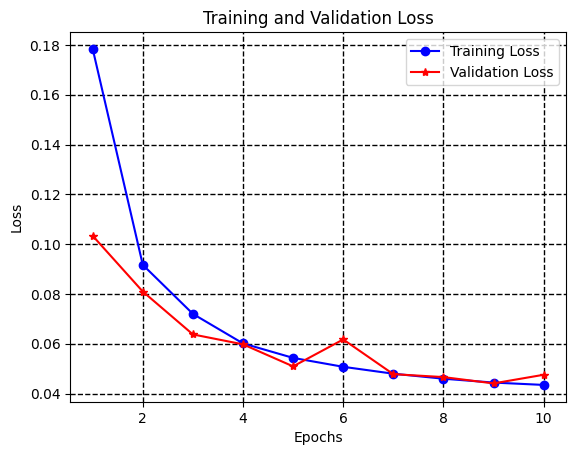

In [ ]:
# Train the model
train_time = hold_out_training(model, X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model, X_test, y_test, train_time):
    # Evaluate the server model on the test data
    score = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test loss: {score[0]: .4f}")
    print(f"Test accuracy: {score[1] * 100:.2f}%")

    # Evaluate the server model on the test data
    start_time = time.time()
    y_pred = np.argmax(model.predict(X_test), axis=1)
    test_time = time.time() - start_time
    y_test = np.array(y_test)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Compute TP, FP, FN, TN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    TN = np.sum(cm) - (TP + FP + FN)

    # Compute accuracy, recall, precision, and F1 score for each class
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Print the results for each class
    for i in range(len(TP)):
        print(f"Class {i+1}:")
        print(f"TP: {TP[i]}")
        print(f"FP: {FP[i]}")
        print(f"FN: {FN[i]}")
        print(f"TN: {TN[i]}")
        print(f"Accuracy: {accuracy[i]* 100:.2f}%")
        print(f"Recall: {recall[i]* 100:.2f}%")
        print(f"Precision: {precision[i]* 100:.2f}%")
        print(f"F1 score: {f1_score[i]* 100:.2f}%")

    print(f"Train time: {train_time : .4f}")
    print(f"Test time: {test_time : .4f}")

    return accuracy, recall, precision, f1_score, train_time, test_time

7696/7696 [==============================] - 19s 2ms/step - loss: 0.0469 - accuracy: 0.9840
Test loss:  0.0469
Test accuracy: 98.40%
7696/7696 [==============================] - 13s 2ms/step


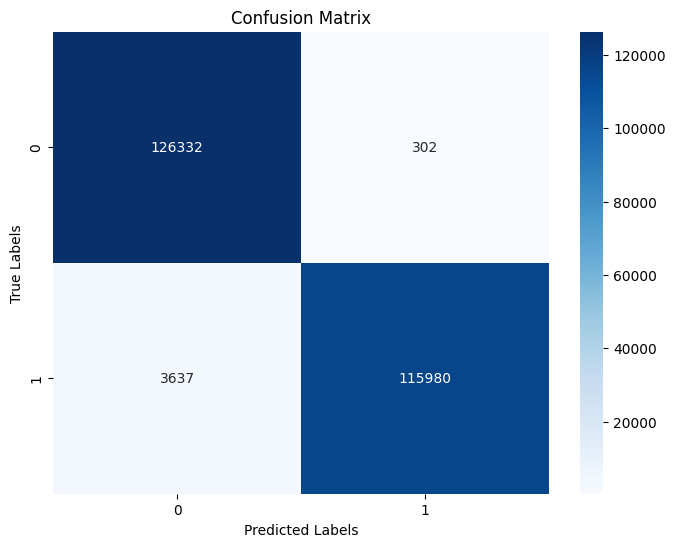

Class 1:
TP: 126332
FP: 3637
FN: 302
TN: 115980
Accuracy: 98.40%
Recall: 99.76%
Precision: 97.20%
F1 score: 98.46%
Class 2:
TP: 115980
FP: 302
FN: 3637
TN: 126332
Accuracy: 98.40%
Recall: 96.96%
Precision: 99.74%
F1 score: 98.33%
Train time:  80.3863
Test time:  18.0316


In [ ]:
# Evaluate the performance of the model
accuracy, recall, precision, f1_score, train_time, test_time = evaluate_model(model, X_test, y_test, train_time)